In [1]:
print("Hello World!")

Hello World!


In [2]:
# importing relevant modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import uniform
from datetime import datetime

## Capital Bike Share

In [3]:
""""
This dataset contains the hourly and daily count of rental bikes between years 2022 and 2023 in Capital bikeshare system with the corresponding weather and seasonal information.

Additional Information aboutb the Variable.
Both hourly.csv and daily.csv have the following fields, except hour which is not available in daily.csv

 Casual: count of casual users
 Registered: count of Registred users
 Date: Year:month:day
 Hour: (0 to 23)
 Total_rides: count of total rental bikes including both casual and members 
 relativehumidity_2m (%): Normalized humidity. The values are divided to 100
 temperature_2m (°C):Normalized temperature in Celsius
 apparent_temperature_mean (°C): Normalized feeling temperature in Celsius.
 weathercode (wmo code): represents different weather conditions. 
 windspeed_10m (km/h): Normalized wind speed
 season:represents,  winter, summer, fall, spring.
 weekday: Days of the week 
 Months: Jan, Feb, ....



"""

'"\nThis dataset contains the hourly and daily count of rental bikes between years 2022 and 2023 in Capital bikeshare system with the corresponding weather and seasonal information.\n\nAdditional Information aboutb the Variable.\nBoth hourly.csv and daily.csv have the following fields, except hour which is not available in daily.csv\n\n Casual: count of casual users\n Registered: count of Registred users\n Date: Year:month:day\n Hour: (0 to 23)\n Total_rides: count of total rental bikes including both casual and members \n relativehumidity_2m (%): Normalized humidity. The values are divided to 100\n temperature_2m (°C):Normalized temperature in Celsius\n apparent_temperature_mean (°C): Normalized feeling temperature in Celsius.\n weathercode (wmo code): represents different weather conditions. \n windspeed_10m (km/h): Normalized wind speed\n season:represents,  winter, summer, fall, spring.\n weekday: Days of the week \n Months: Jan, Feb, ....\n\n\n\n'

## Loading Hourly Dataset

In [4]:
# loading csv file
hour=pd.read_csv("CBS_2021-2023_Hourly_Weather.csv", sep=None)

C:\Users\godwi\AppData\Local\Temp\ipykernel_7236\2537278405.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  hour=pd.read_csv("CBS_2021-2023_Hourly_Weather.csv", sep=None)


In [5]:
# getting summary of Data set
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26280 non-null  object 
 2   Hour                     26280 non-null  int64  
 3   Member                   26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   relativehumidity_2m (%)  26280 non-null  int64  
 6   temperature_2m (°C)      26280 non-null  float64
 7   weathercode (wmo code)   26280 non-null  int64  
 8   windspeed_10m (km/h)     26280 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB


In [6]:
hour.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


In [7]:
# getting the statistics of the Dataset
hour.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Casual,26269.0,159.93,167.33,0.0,28.00,105.0,237.00,1206.0
Hour,26280.0,11.50,6.92,0.0,5.75,11.5,17.25,23.0
Member,26269.0,247.17,225.28,0.0,55.00,203.0,371.00,1534.0
Total_rides,26269.0,407.10,373.01,1.0,85.00,319.0,616.00,2262.0
relativehumidity_2m (%),26280.0,62.97,22.72,5.0,46.00,64.0,82.00,100.0
temperature_2m (°C),26280.0,14.41,10.29,-14.6,6.10,14.8,22.70,41.5
weathercode (wmo code),26280.0,7.23,17.63,0.0,0.00,1.0,2.00,75.0
windspeed_10m (km/h),26280.0,10.17,5.26,0.0,6.50,9.2,12.90,40.1


In [8]:
#getting the shape of the DataFrame
hour.shape

(26280, 9)

## Data Wrangling

Renaming some features

In [9]:
## renaming some features
hour.rename(columns={'Member': 'Registered'}, inplace=True)

In [10]:
## renaming some features
hour.rename(columns={"relativehumidity_2m (%)":"Relativehumidity_2m (%)",	"temperature_2m (°C)":"Temperature_2m (°C)",	"weathercode (wmo code)":"Weathercode (wmo code)","windspeed_10m (km/h)":"Windspeed_10m (km/h)"}, inplace=True)

In [11]:
hour.head()

,Casual,Date,Hour,Registered,Total_rides,Relativehumidity_2m (%),Temperature_2m (°C),Weathercode (wmo code),Windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


### Checking for Missing values

In [12]:
## checking for missing values in Data Set
hour.isnull().sum()
## Missing values for casual, member,total_rides are 11,11,11 respectively

Casual                     11
Date                        0
Hour                        0
Registered                 11
Total_rides                11
Relativehumidity_2m (%)     0
Temperature_2m (°C)         0
Weathercode (wmo code)      0
Windspeed_10m (km/h)        0
dtype: int64

Dropping of missing values

In [13]:
#dropping missing values
hour.dropna(inplace=True)

In [14]:
#resetting index of the Data Frame
hourly=hour.reset_index(drop=True)
# get the info of the Data Frame
print(hourly.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26269 non-null  object 
 2   Hour                     26269 non-null  int64  
 3   Registered               26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   Relativehumidity_2m (%)  26269 non-null  int64  
 6   Temperature_2m (°C)      26269 non-null  float64
 7   Weathercode (wmo code)   26269 non-null  int64  
 8   Windspeed_10m (km/h)     26269 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.8+ MB
None


Converting some columns to integer

In [15]:
# convert some features to correct Data type 
hour['Casual'] = hour['Casual'].astype(int)
hour['Registered'] = hour['Registered'].astype(int)
hour['Total_rides'] = hour['Total_rides'].astype(int)

## Creating of new columns

In [16]:
hourly["Weathercode (wmo code)"].value_counts()

Weathercode (wmo code)
0     11425
1      6002
3      3289
2      2507
51     1393
53      602
61      400
63      222
55      194
71      100
73       90
75       28
65       17
Name: count, dtype: int64

In [17]:
# adding new column with user friendly translation of WMO Code
hourly['Weather'] = hourly['Weathercode (wmo code)'].apply(lambda value: 'Clear'
if value == 0 else 'Clear'
if value == 1 else 'Clear'
if value == 3 else 'Cloudy'
if value == 2 else 'Clear'
if value == 51 else 'Drizzle'
if value == 53 else 'Drizzle'
if value == 55 else 'Drizzle'
if value == 61 else 'Rain'
if value == 63 else 'Rain'
if value == 65 else 'Rain'
if value == 71 else 'Snowy'
if value == 73 else 'Snowy'
if value == 75 else 'Snowy')


In [18]:
#define a function to categorize weather classes 

def categorize_Weather(Weather):
    if Weather in ['Clear']:
        return 1
    else:
        return 0

# Apply this function to create a new column 
hourly['Clear Weather'] = hourly['Weather'].apply(categorize_Weather)

def categorize_Weather(Weather):
    if Weather in ['Cloudy']:
        return 1
    else:
        return 0

# Apply this function to create a new column 
hourly['Cloudy Weather'] = hourly['Weather'].apply(categorize_Weather)

def categorize_Weather(Weather):
    if Weather in ['Drizzle']:
        return 1
    else:
        return 0

# Apply this function to create a new column
hourly['Drizzle Weather'] = hourly['Weather'].apply(categorize_Weather)

def categorize_Weather(Weather):
    if Weather in ['Rain']:
        return 1
    else:
        return 0

# Apply this function to create a new column
hourly['Rainy Weather'] = hourly['Weather'].apply(categorize_Weather)

def categorize_Weather(Weather):
    if Weather in ['Snowy']:
        return 1
    else:
        return 0

# Apply this function to create a new column
hourly['Snowy Weather'] = hourly['Weather'].apply(categorize_Weather)



In [19]:
hourly.head()

,Casual,Date,Hour,Registered,Total_rides,Relativehumidity_2m (%),Temperature_2m (°C),Weathercode (wmo code),Windspeed_10m (km/h),Weather,Clear Weather,Cloudy Weather,Drizzle Weather,Rainy Weather,Snowy Weather
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,Clear,1,0,0,0,0
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,Clear,1,0,0,0,0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,Cloudy,0,1,0,0,0
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,Cloudy,0,1,0,0,0
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,Cloudy,0,1,0,0,0


In [20]:
#Season
# Function to get season
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Fall"

# Function to categorize season based on date
def categorize_season(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    month = dt.month
    return get_season(month)

# Apply function to create a new column
hourly['Season'] = hourly['Date'].apply(categorize_season)



In [21]:
##WEEKDAY
# Function to get weekday
def get_weekday(day):
    weekdays = ["Mon.", "Tue.", "Wed.", "Thur.", "Fri.", "Sat.", "Sun."]
    return weekdays[day]

# Function to categorize weekday based on date
def categorize_week(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    weekday = dt.weekday()  # 0 for Monday, 1 for Tuesday, ..., 6 for Sunday
    return get_weekday(weekday)

# Apply function to create a new column
hourly['Weekday'] = hourly['Date'].apply(categorize_week)

In [22]:
# Extract year from the 'Date' column
hourly['Year'] = pd.to_datetime(hourly['Date']).dt.year

In [23]:
def categorize_day(Weekday):
    if Weekday in ['Mon.', 'Tue.', 'Wed.', 'Thur.', 'Fri.']:
        return 'Workingday'
    else:
        return 'Weekend'

# Apply this function to create a new column 'Day_cat'
hourly['Workingday'] = hourly['Weekday'].apply(categorize_day)




In [24]:
# Converting Weekday to binary class
hourly.loc[hourly['Workingday'] == "Weekend", 'Workingday'] = 'No'
hourly.loc[hourly['Workingday'] == "Workingday", 'Workingday'] = 'Yes'

In [25]:
#Month
# Function to get month
def get_month(month):
    months = ["Jan.", "Feb.", "Mar.", "Apr.", "May", "Jun.", "Jul.", "Aug.", "Sep.", "Oct.", "Nov.", "Dec."]
    return months[month - 1]

# Function to categorize month based on date
def categorize_month(date):
    dt = datetime.strptime(date, "%Y-%m-%d")
    month = dt.month
    return get_month(month)

# Apply function to create a new column
hourly['Month'] = hourly['Date'].apply(categorize_month)

In [26]:
## Minutes
# Function to convert hours to minutes
def hours_to_minutes(hour):
    return hour * 60

# Apply function to create a new column 'Minutes'
hourly['Minutes'] = hourly['Hour'].apply(hours_to_minutes)


In [27]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26269 non-null  object 
 2   Hour                     26269 non-null  int64  
 3   Registered               26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   Relativehumidity_2m (%)  26269 non-null  int64  
 6   Temperature_2m (°C)      26269 non-null  float64
 7   Weathercode (wmo code)   26269 non-null  int64  
 8   Windspeed_10m (km/h)     26269 non-null  float64
 9   Weather                  26269 non-null  object 
 10  Clear Weather            26269 non-null  int64  
 11  Cloudy Weather           26269 non-null  int64  
 12  Drizzle Weather          26269 non-null  int64  
 13  Rainy Weather            26269 non-null  int64  
 14  Snowy Weather         

Seperation of years 

2021 Data Frame

In [28]:
# Convert 'Date' column to datetime type
hourly['Date'] = pd.to_datetime(hourly['Date'])

# Filter the DataFrame for rows where the year is 2021
hourly_2021 = hourly[hourly['Date'].dt.year == 2021]


In [29]:
hourly_2021.shape

(8752, 21)

In [30]:
# resetting index
hourly_2021.reset_index(inplace=True)
#dropping the index column
hourly_2021.drop(["index"],axis=1, inplace=True)

C:\Users\godwi\AppData\Local\Temp\ipykernel_7236\2109429784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_2021.drop(["index"],axis=1, inplace=True)


2022 Data Frame

In [31]:
# Convert 'Date' column to datetime type
hourly['Date'] = pd.to_datetime(hourly['Date'])
# Filter the DataFrame for rows where the year is 2021
hourly_2022 = hourly[hourly['Date'].dt.year == 2022]


In [32]:
hourly_2022.shape

(8758, 21)

In [33]:
# resetting index
hourly_2022.reset_index(inplace=True)
#dropping the index column
hourly_2022.drop(["index"],axis=1, inplace=True)


C:\Users\godwi\AppData\Local\Temp\ipykernel_7236\3099469902.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_2022.drop(["index"],axis=1, inplace=True)


2023 Data Frame

In [34]:
# Convert 'Date' column to datetime type
hourly['Date'] = pd.to_datetime(hourly['Date'])

# Filter the DataFrame for rows where the year is 2021
hourly_2023 = hourly[hourly['Date'].dt.year == 2023]


In [35]:
hourly_2023.shape

(8759, 21)

In [36]:
# resetting index
hourly_2023.reset_index(inplace=True)
# dropping the index column
hourly_2023.drop(["index"],axis=1, inplace=True)


C:\Users\godwi\AppData\Local\Temp\ipykernel_7236\2019195505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_2023.drop(["index"],axis=1, inplace=True)


In [37]:
hourly_2023.tail()

,Casual,Date,Hour,Registered,Total_rides,Relativehumidity_2m (%),Temperature_2m (°C),Weathercode (wmo code),Windspeed_10m (km/h),Weather,...,Cloudy Weather,Drizzle Weather,Rainy Weather,Snowy Weather,Season,Weekday,Year,Workingday,Month,Minutes
8754,132.0,2023-12-31,19,190.0,322.0,71,-7.7,0,3.3,Clear,...,0,0,0,0,Winter,Sun.,2023,No,Dec.,1140
8755,125.0,2023-12-31,20,194.0,319.0,79,-10.2,0,6.7,Clear,...,0,0,0,0,Winter,Sun.,2023,No,Dec.,1200
8756,84.0,2023-12-31,21,137.0,221.0,80,-11.0,0,10.0,Clear,...,0,0,0,0,Winter,Sun.,2023,No,Dec.,1260
8757,83.0,2023-12-31,22,142.0,225.0,80,-10.4,0,8.7,Clear,...,0,0,0,0,Winter,Sun.,2023,No,Dec.,1320
8758,82.0,2023-12-31,23,106.0,188.0,73,-8.5,0,3.7,Clear,...,0,0,0,0,Winter,Sun.,2023,No,Dec.,1380


In [80]:
hourly.to_csv("hourly_ml.csv", index=False)

# Exploratory Data Analysis

Some Hypotheses formulation

In [38]:
"""""
Hourly trend: most of the businesses have rush hours and weak hours. It should not be an exception for bike rentals as well.

Daily Trend: weekdays vs weekends and registered users vs casual users.

Relative humdity: the demand for bikes might be changed on a rainy day as compared to a sunny day. Similarly, people prefer to go out on less humid days.

Temperature: in warm countries, temperature generally keeps people inside.

Business model: businesses often rely on customers who are members more than casual users. There might be some interesting insights that can strengthen this assumption.

Growth rate: Bike share over the years has geometric growth rate.

"""

'""\nHourly trend: most of the businesses have rush hours and weak hours. It should not be an exception for bike rentals as well.\n\nDaily Trend: weekdays vs weekends and registered users vs casual users.\n\nRelative humdity: the demand for bikes might be changed on a rainy day as compared to a sunny day. Similarly, people prefer to go out on less humid days.\n\nTemperature: in warm countries, temperature generally keeps people inside.\n\nBusiness model: businesses often rely on customers who are members more than casual users. There might be some interesting insights that can strengthen this assumption.\n\nGrowth rate: Bike share over the years has geometric growth rate.\n\n'

Complete Dataset Analysis

Temporal Analysis

Month Analysis

Text(0.5, 1.0, 'Monthly Distribution of Bike Total Rides 2023')

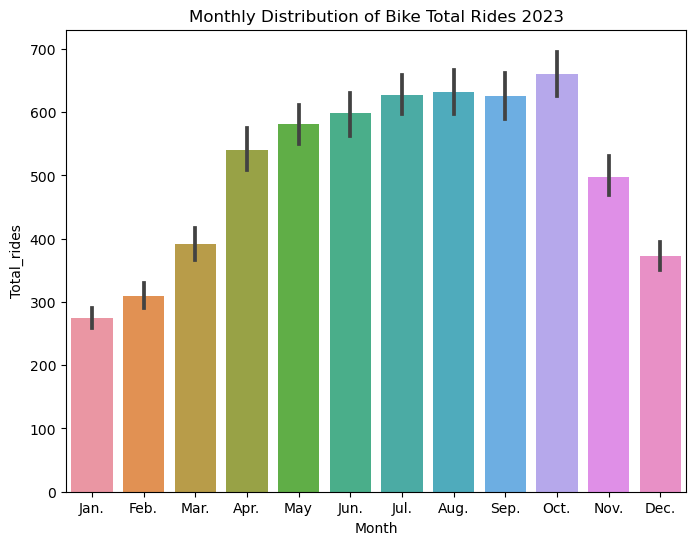

In [39]:
#Explore ride counts over time (daily, hourly, monthly) using line plots or bar plots.
## Month
plt.figure(figsize=(8, 6))
sns.barplot(x="Month", y="Total_rides",
          
             data=hourly_2023)
plt.title("Monthly Distribution of Bike Total Rides 2023")

In [40]:
hourly.head()

,Casual,Date,Hour,Registered,Total_rides,Relativehumidity_2m (%),Temperature_2m (°C),Weathercode (wmo code),Windspeed_10m (km/h),Weather,...,Cloudy Weather,Drizzle Weather,Rainy Weather,Snowy Weather,Season,Weekday,Year,Workingday,Month,Minutes
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,Clear,...,0,0,0,0,Winter,Fri.,2021,Yes,Jan.,0
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,Clear,...,0,0,0,0,Winter,Fri.,2021,Yes,Jan.,60
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,Cloudy,...,1,0,0,0,Winter,Fri.,2021,Yes,Jan.,120
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,Cloudy,...,1,0,0,0,Winter,Fri.,2021,Yes,Jan.,180
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,Cloudy,...,1,0,0,0,Winter,Fri.,2021,Yes,Jan.,240


Weekday Analysis

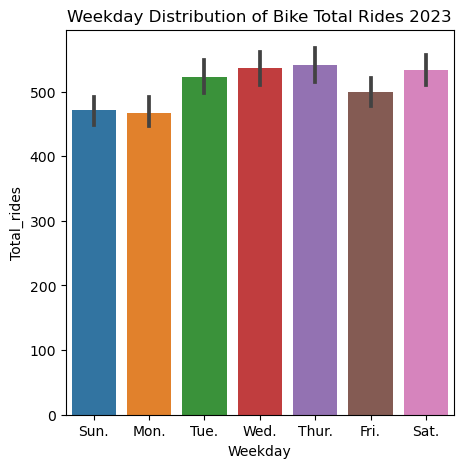

In [41]:
plt.figure(figsize=(5, 5))
sns.barplot(x="Weekday", y="Total_rides", data=hourly_2023)
plt.title("Weekday Distribution of Bike Total Rides 2023")
plt.show()

Text(0.5, 1.0, 'Weekday Distribution of Bike Total Rides 2023')

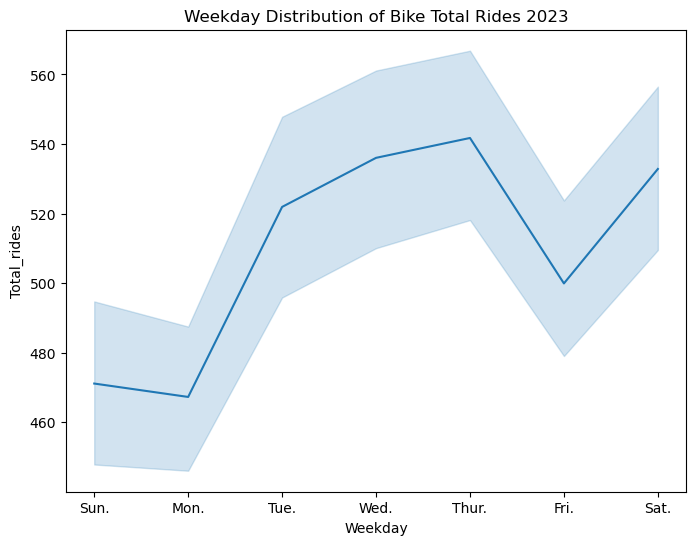

In [42]:
plt.figure(figsize=(8, 6))
sns.lineplot(x="Weekday", y="Total_rides",
          
             data=hourly_2023)
plt.title("Weekday Distribution of Bike Total Rides 2023")

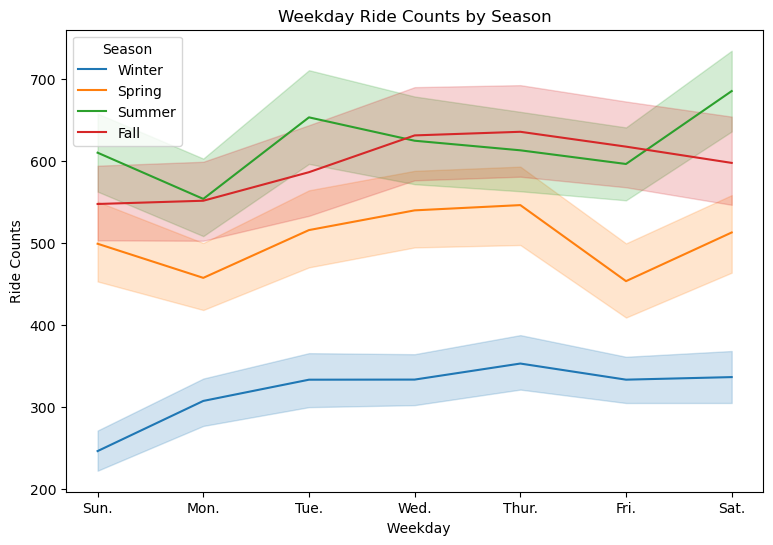

In [43]:
# Create line plot
plt.figure(figsize=(9, 6))
sns.lineplot(x='Weekday', y='Total_rides', hue='Season', data=hourly_2023)
plt.title('Weekday Ride Counts by Season')
plt.xlabel('  Weekday')
plt.ylabel('Ride Counts')
plt.legend(title='Season')
plt.show()

In [44]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Casual                   26269 non-null  float64       
 1   Date                     26269 non-null  datetime64[ns]
 2   Hour                     26269 non-null  int64         
 3   Registered               26269 non-null  float64       
 4   Total_rides              26269 non-null  float64       
 5   Relativehumidity_2m (%)  26269 non-null  int64         
 6   Temperature_2m (°C)      26269 non-null  float64       
 7   Weathercode (wmo code)   26269 non-null  int64         
 8   Windspeed_10m (km/h)     26269 non-null  float64       
 9   Weather                  26269 non-null  object        
 10  Clear Weather            26269 non-null  int64         
 11  Cloudy Weather           26269 non-null  int64         
 12  Drizzle Weather          26269 n

In [45]:
weekday_analysis=hourly.iloc[:,[16,0,3,4]]

In [46]:
weekday_analysis

,Weekday,Casual,Registered,Total_rides
0,Fri.,20.0,26.0,46.0
1,Fri.,23.0,23.0,46.0
2,Fri.,20.0,28.0,48.0
3,Fri.,9.0,7.0,16.0
4,Fri.,7.0,5.0,12.0
...,...,...,...,...
26264,Sun.,132.0,190.0,322.0
26265,Sun.,125.0,194.0,319.0
26266,Sun.,84.0,137.0,221.0
26267,Sun.,83.0,142.0,225.0


In [47]:
weekday_analysis_result=weekday_analysis.groupby("Weekday").sum()

Text(0.5, 1.0, 'Weekday Distribution of Total Rides in 2023')

<Figure size 1000x1200 with 0 Axes>

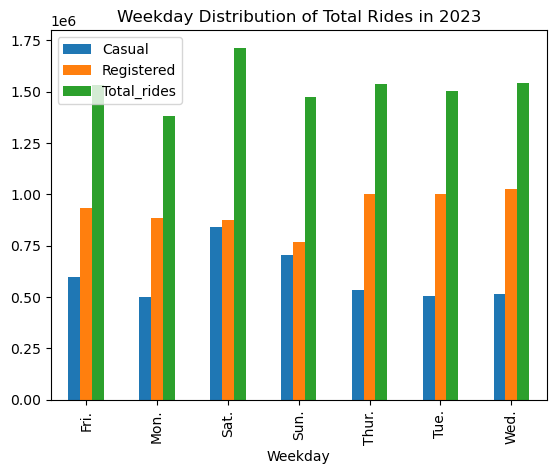

In [48]:
plt.figure(figsize=(10, 12))
weekday_analysis_result.plot.bar()
plt.title("Weekday Distribution of Total Rides in 2023")

<Axes: xlabel='Weekday', ylabel='Total_rides'>

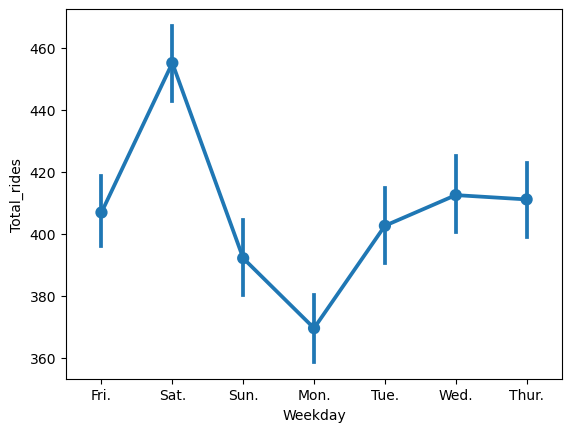

In [49]:
sns.pointplot(hourly,x="Weekday", y="Total_rides")

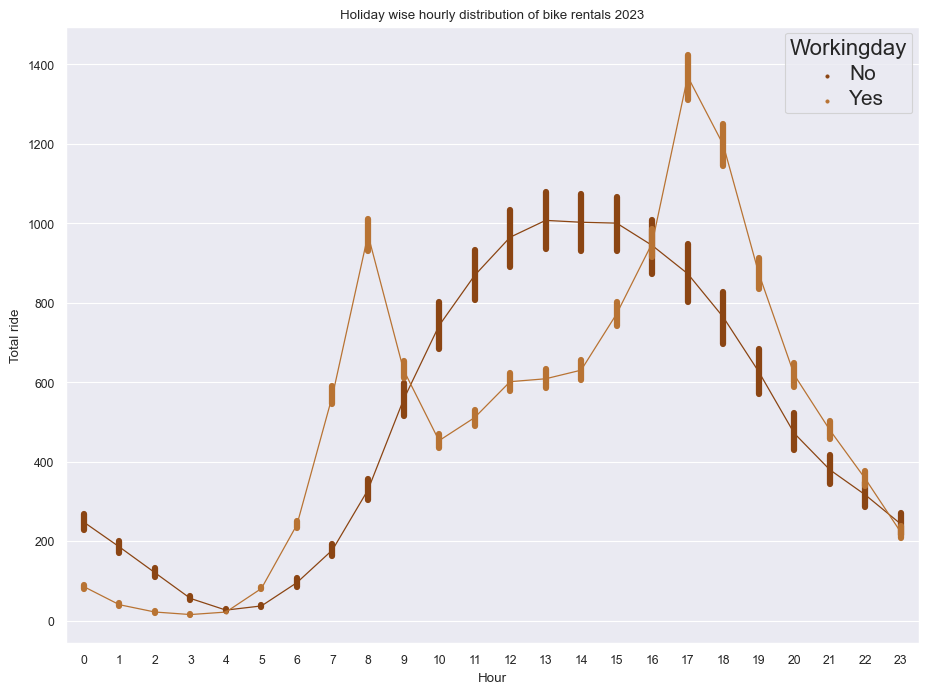

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom palette with brown and dark copper colors
hue_palette = ["#8B4513", "#B87333"]

# Set the figure size and context
sns.set(rc={'figure.figsize':(11,8)})
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")

# Plot the pointplot with the custom palette
ax = sns.pointplot(data=hourly_2023, x='Hour', y='Total_rides', scale=0.2, hue='Workingday', palette=hue_palette)

# Set legend font sizes
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='16')

# Set titles and labels
ax.set(title='Holiday wise hourly distribution of bike rentals 2023', ylabel='Total ride', xlabel='Hour')

# Save the plot
plt.savefig("Holiday wise hourly distribution of bike rentals.png", dpi=80)


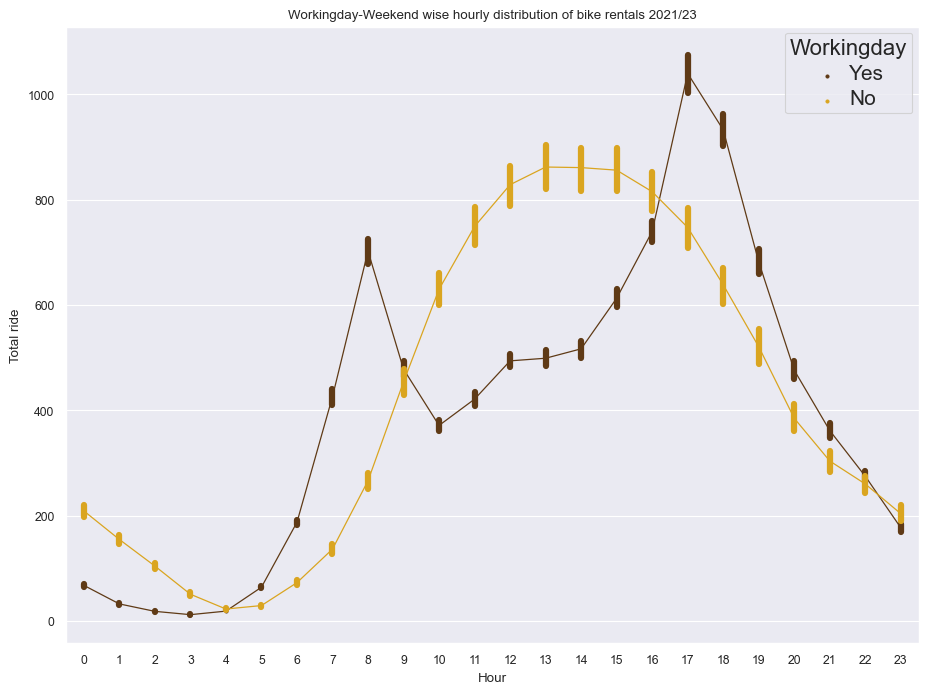

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom palette with adjusted contrast for brown and dark copper colors
hue_palette = ["#5F3A16", "#DAA520"]  # Darker brown and lighter dark copper

# Set the figure size and context
sns.set(rc={'figure.figsize':(11,8)})
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")

# Plot the pointplot with the adjusted palette
ax = sns.pointplot(data=hourly, x='Hour', y='Total_rides', scale=0.2, hue='Workingday', palette=hue_palette)

# Set legend font sizes
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='16')

# Set titles and labels
ax.set(title='Workingday-Weekend wise hourly distribution of bike rentals 2021/23', ylabel='Total ride', xlabel='Hour')

# Save the plot
plt.savefig("Holiday wise hourly distribution of bike rentals.png", dpi=80)


Hour Analysis

Text(0.5, 1.0, 'Season wise Hourly Distribution of Bike Total Rides 2023')

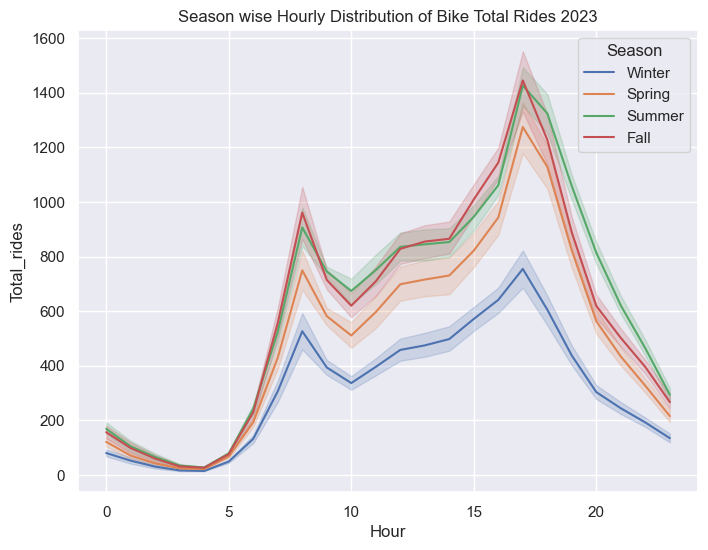

In [53]:

sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data


plt.figure(figsize=(8, 6))
sns.lineplot(x="Hour", y="Total_rides",
             hue="Season",
             data=hourly_2023)
plt.title("Season wise Hourly Distribution of Bike Total Rides 2023")

[Text(0.5, 1.0, 'Weekly Hourly Trend of bike rentals'),
 Text(0, 0.5, '(total_count)')]

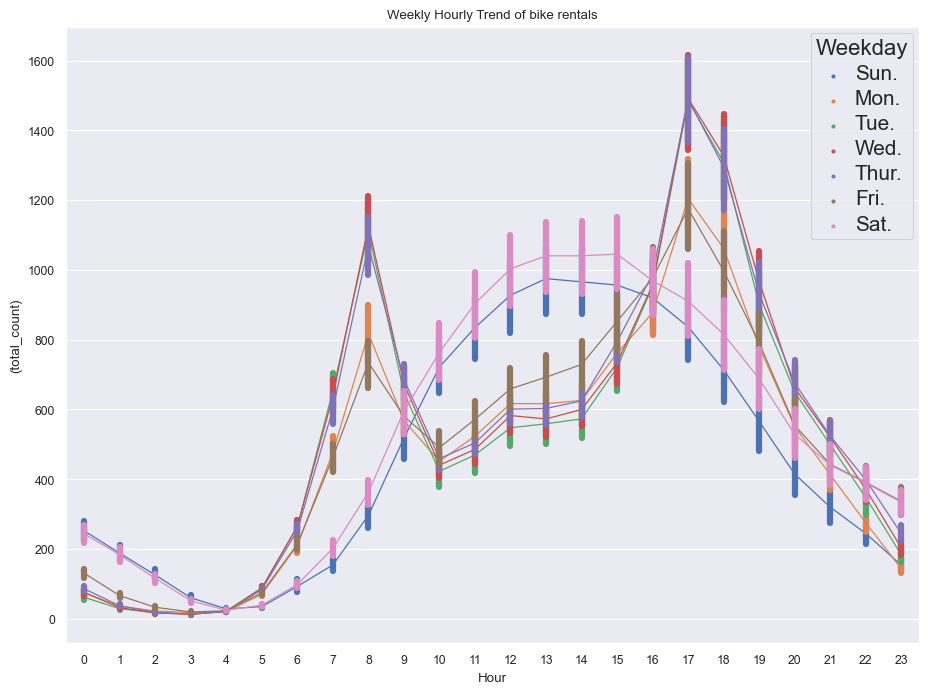

In [54]:
# 2nd visualization - 'Season wise hourly distribution of bike rentals'

sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("darkgrid")

#fig, ax = plt.subplots()
ax = sns.pointplot(data =hourly_2023, x = "Hour", y ="Total_rides", scale = 0.2, hue = 'Weekday')

plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='16')

ax.set(title = 'Weekly Hourly Trend of bike rentals',ylabel= '(total_count)')


Minutes Analysis

Text(0.5, 1.0, '2021 Minutes Ride Count')

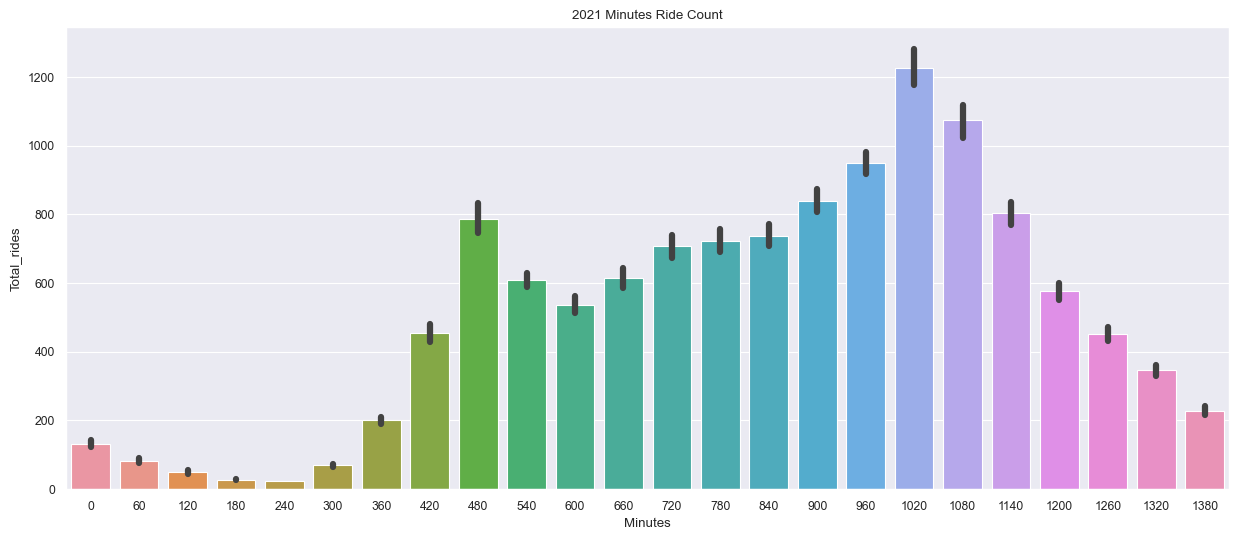

In [55]:
plt.figure(figsize=(15, 6))
sns.barplot(x="Minutes", y="Total_rides",
      
             data=hourly_2023)
plt.title("2021 Minutes Ride Count")

In [56]:
#Categorical Variables:

#Explore distribution of rides by categorical variables such as season, weather conditions, holidays, etc. using bar plots or count plots.




Season Analysis

[Text(0.5, 1.0, 'Season Trend of bike rentals'), Text(0, 0.5, '(total_count)')]

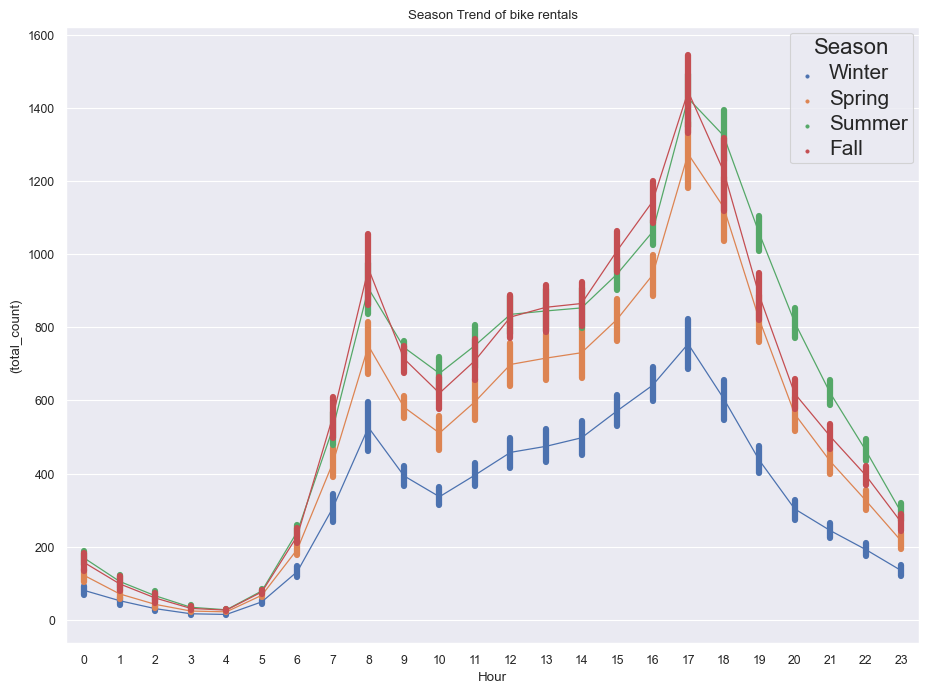

In [57]:
sns.set(rc={'figure.figsize':(11,8)})

sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 2.5})
#sns.set(style="ticks", context="talk")
#plt.style.use("dark_background")
sns.set_style("darkgrid")

#fig, ax = plt.subplots()
ax = sns.pointplot(data =hourly_2023, x = "Hour", y ="Total_rides", scale = 0.2, hue = 'Season')

plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='16')

ax.set(title = 'Season Trend of bike rentals',ylabel= '(total_count)')

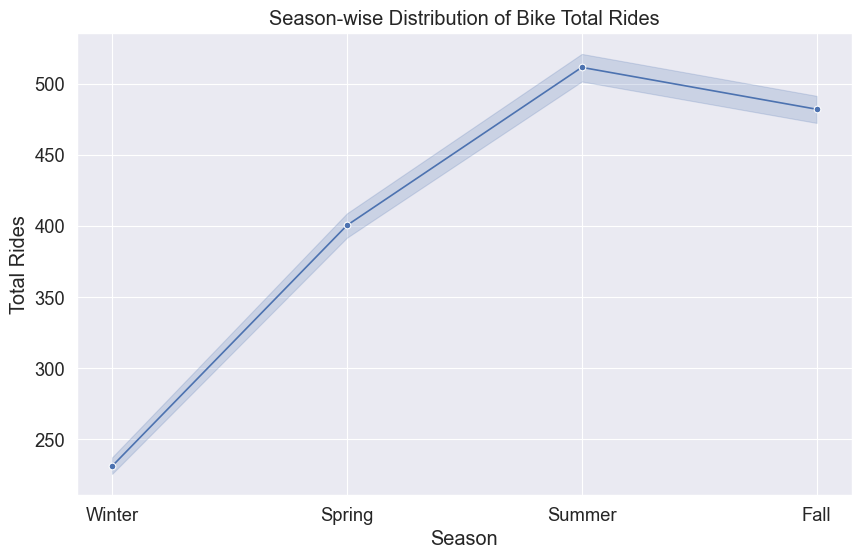

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size and context
sns.set(rc={'figure.figsize':(10, 6)})
sns.set_context("paper", font_scale=1.5)

# Plot the line plot
sns.lineplot(x="Season", y="Total_rides", data=hourly, marker='o')

# Set titles and labels
plt.title("Season-wise Distribution of Bike Total Rides")
plt.xlabel("Season")
plt.ylabel("Total Rides")

# Show the plot
plt.show()


In [59]:
season_counts = hourly["Season"].value_counts()
print(season_counts)

Season
Summer    6624
Spring    6621
Fall      6552
Winter    6472
Name: count, dtype: int64


C:\Users\godwi\AppData\Local\Temp\ipykernel_7236\383742147.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Season", y="Total_rides", data=hourly, palette=custom_palette, ci=None)


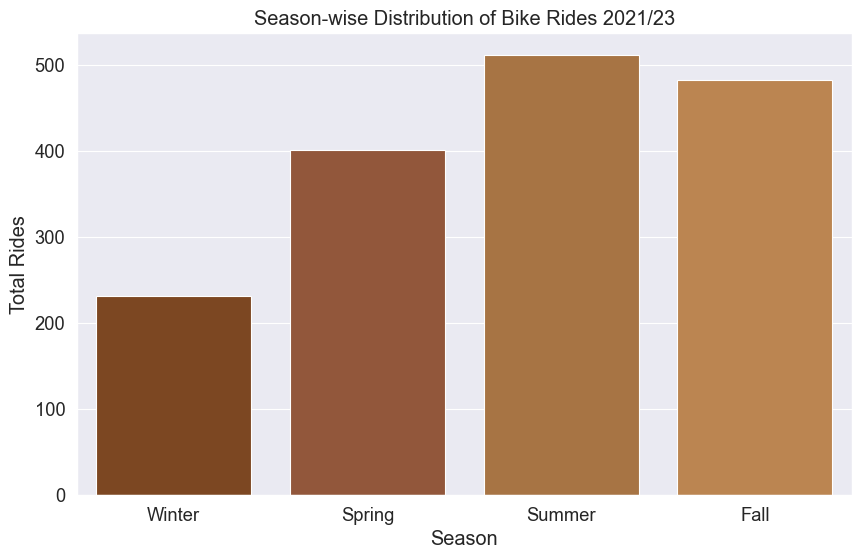

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom palette with shades of brown and copper
custom_palette = ["#8B4513", "#A0522D", "#B87333", "#CD853F"]

# Set the figure size and context
sns.set(rc={'figure.figsize':(10, 6)})
sns.set_context("paper", font_scale=1.5)

# Plot the bar plot with the custom palette
sns.barplot(x="Season", y="Total_rides", data=hourly, palette=custom_palette, ci=None)

# Set titles and labels
plt.title("Season-wise Distribution of Bike Rides 2021/23")
plt.xlabel("Season")
plt.ylabel("Total Rides")

# Show the plot
plt.show()


Text(0.5, 1.0, 'Season wise Distribution of Bike Total Rides')

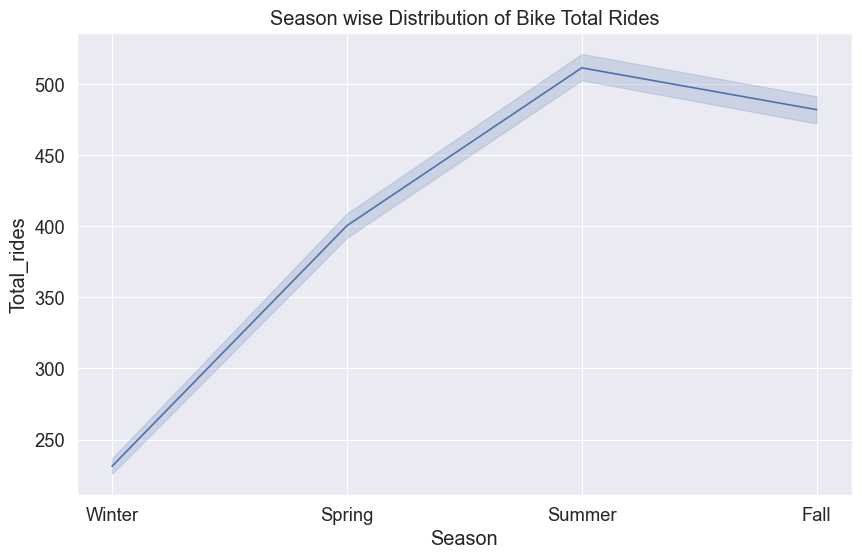

In [61]:
sns.lineplot(x="Season", y="Total_rides",
             #hue="Season",
             data=hourly,)
plt.title("Season wise Distribution of Bike Total Rides")

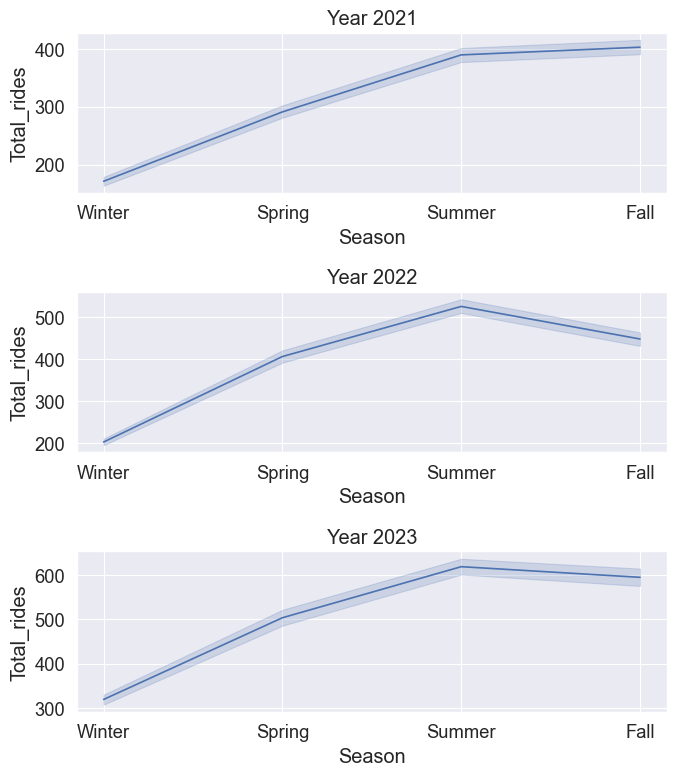

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame with columns for the three line plots

# Create a figure
plt.figure(figsize=(7, 8))

# Plot the first line plot
plt.subplot(3, 1, 1)
sns.lineplot(hourly_2021,x="Season",y="Total_rides")
plt.title("Year 2021")

# Plot the second line plot
plt.subplot(3, 1, 2)
sns.lineplot(hourly_2022,x="Season",y="Total_rides")
plt.title("Year 2022")

# Plot the third line plot
plt.subplot(3, 1, 3)
sns.lineplot(hourly_2023,x="Season",y="Total_rides")
plt.title("Year 2023")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [63]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Casual                   26269 non-null  float64       
 1   Date                     26269 non-null  datetime64[ns]
 2   Hour                     26269 non-null  int64         
 3   Registered               26269 non-null  float64       
 4   Total_rides              26269 non-null  float64       
 5   Relativehumidity_2m (%)  26269 non-null  int64         
 6   Temperature_2m (°C)      26269 non-null  float64       
 7   Weathercode (wmo code)   26269 non-null  int64         
 8   Windspeed_10m (km/h)     26269 non-null  float64       
 9   Weather                  26269 non-null  object        
 10  Clear Weather            26269 non-null  int64         
 11  Cloudy Weather           26269 non-null  int64         
 12  Drizzle Weather          26269 n

In [64]:
daily_trend_analysis=hourly_2023.iloc[:,[16,0,3]]
daily_trend_analysis=daily_trend_analysis.copy()
daily_trend_analysis

,Weekday,Casual,Registered
0,Sun.,57.0,77.0
1,Sun.,96.0,100.0
2,Sun.,107.0,74.0
3,Sun.,46.0,34.0
4,Sun.,11.0,15.0
...,...,...,...
8754,Sun.,132.0,190.0
8755,Sun.,125.0,194.0
8756,Sun.,84.0,137.0
8757,Sun.,83.0,142.0


In [65]:
daily_trend_analysis_result=daily_trend_analysis.groupby("Weekday").sum()

Text(0.5, 1.0, 'Daily Trend 2023')

<Figure size 500x500 with 0 Axes>

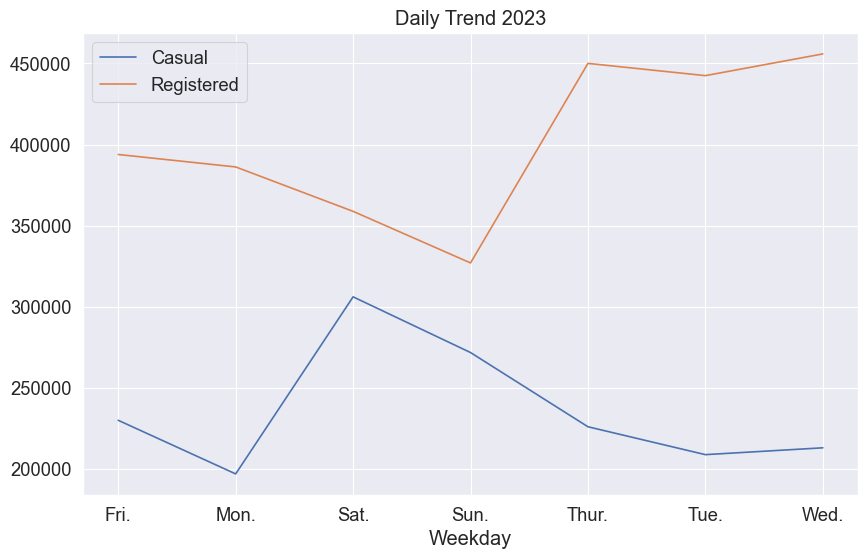

In [66]:
plt.figure(figsize=(5,5))
#sns.barplot(data=season_analysis_result)
daily_trend_analysis_result.plot()
plt.title("Daily Trend 2023")

In [67]:
hourly_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Casual                   8759 non-null   float64       
 1   Date                     8759 non-null   datetime64[ns]
 2   Hour                     8759 non-null   int64         
 3   Registered               8759 non-null   float64       
 4   Total_rides              8759 non-null   float64       
 5   Relativehumidity_2m (%)  8759 non-null   int64         
 6   Temperature_2m (°C)      8759 non-null   float64       
 7   Weathercode (wmo code)   8759 non-null   int64         
 8   Windspeed_10m (km/h)     8759 non-null   float64       
 9   Weather                  8759 non-null   object        
 10  Clear Weather            8759 non-null   int64         
 11  Cloudy Weather           8759 non-null   int64         
 12  Drizzle Weather          8759 non-

In [68]:
weather_analysis_2023=hourly_2023.iloc[:,[9,0,3,4]]

In [69]:
weather_analysis_2023_copy= weather_analysis_2023.copy()
weather_analysis_2023

,Weather,Casual,Registered,Total_rides
0,Clear,57.0,77.0,134.0
1,Clear,96.0,100.0,196.0
2,Clear,107.0,74.0,181.0
3,Clear,46.0,34.0,80.0
4,Clear,11.0,15.0,26.0
...,...,...,...,...
8754,Clear,132.0,190.0,322.0
8755,Clear,125.0,194.0,319.0
8756,Clear,84.0,137.0,221.0
8757,Clear,83.0,142.0,225.0


In [70]:
weather_analysis_result=weather_analysis_2023.groupby("Weather").sum()

Text(0.5, 1.0, 'Season Analysis 2023')

<Figure size 800x800 with 0 Axes>

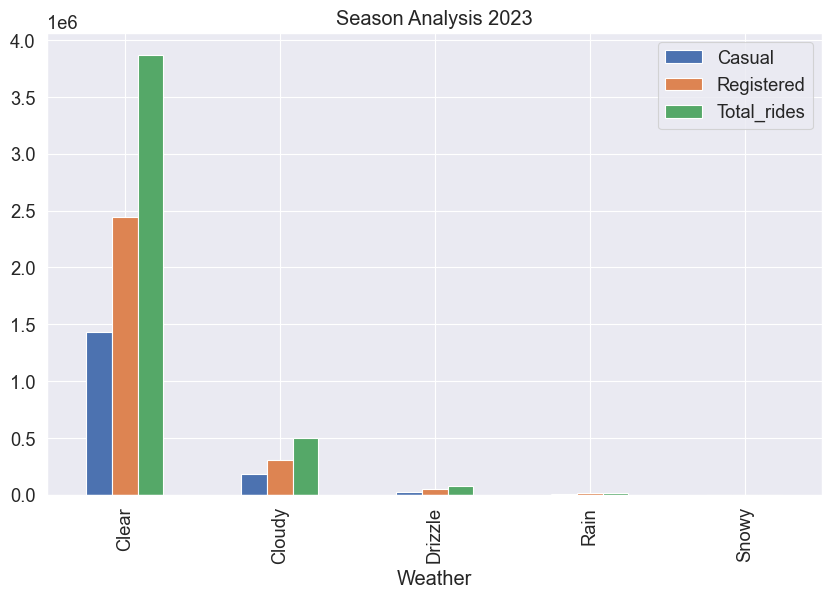

In [71]:
plt.figure(figsize=(8,8))

weather_analysis_result.plot.bar()
plt.title("Season Analysis 2023")

In [72]:
weather_analysis_2023_copy.drop(["Total_rides"], axis=1, inplace=True)



In [73]:
weather_analysis_2023_copy

,Weather,Casual,Registered
0,Clear,57.0,77.0
1,Clear,96.0,100.0
2,Clear,107.0,74.0
3,Clear,46.0,34.0
4,Clear,11.0,15.0
...,...,...,...
8754,Clear,132.0,190.0
8755,Clear,125.0,194.0
8756,Clear,84.0,137.0
8757,Clear,83.0,142.0


User Analysis

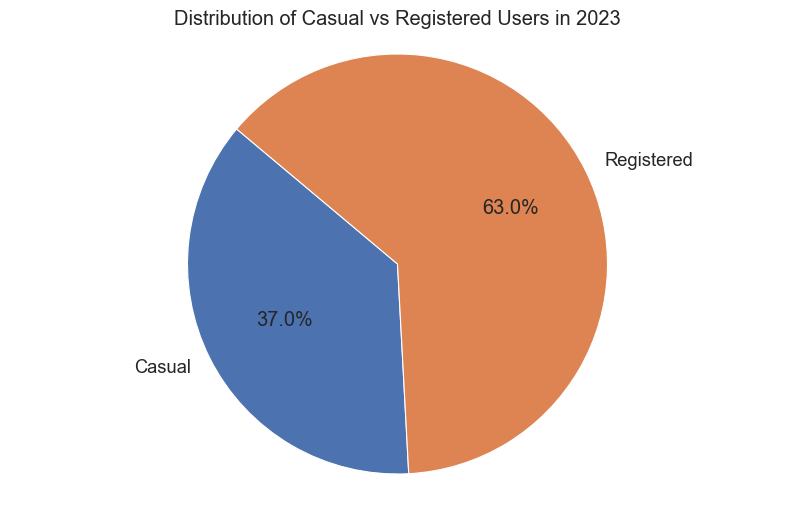

In [75]:
# Sample data


# Aggregate data by summing up 'Casual' and 'Registered' counts
season_counts = weather_analysis_2023_copy.groupby('Weather').sum().reset_index()

# Plotting
labels = ['Casual', 'Registered']
sizes = season_counts.loc[0, ['Casual', 'Registered']].values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Distribution of Casual vs Registered Users in 2023')

# Show plot
plt.show()


In [76]:
hourly_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Casual                   8759 non-null   float64       
 1   Date                     8759 non-null   datetime64[ns]
 2   Hour                     8759 non-null   int64         
 3   Registered               8759 non-null   float64       
 4   Total_rides              8759 non-null   float64       
 5   Relativehumidity_2m (%)  8759 non-null   int64         
 6   Temperature_2m (°C)      8759 non-null   float64       
 7   Weathercode (wmo code)   8759 non-null   int64         
 8   Windspeed_10m (km/h)     8759 non-null   float64       
 9   Weather                  8759 non-null   object        
 10  Clear Weather            8759 non-null   int64         
 11  Cloudy Weather           8759 non-null   int64         
 12  Drizzle Weather          8759 non-

Text(0.5, 1.0, 'Windspeed Distribution of Bike Total Rides 2023')

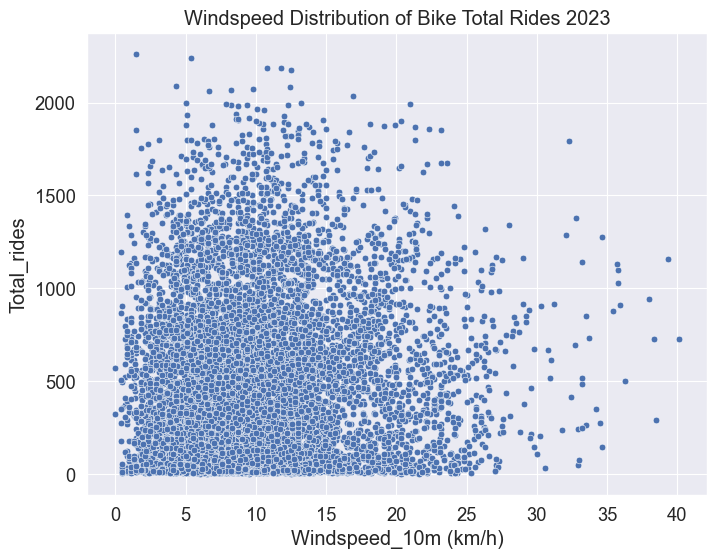

In [77]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Windspeed_10m (km/h)", y="Total_rides",
             #hue="Season",
             data=hourly_2023)
plt.title("Windspeed Distribution of Bike Total Rides 2023")

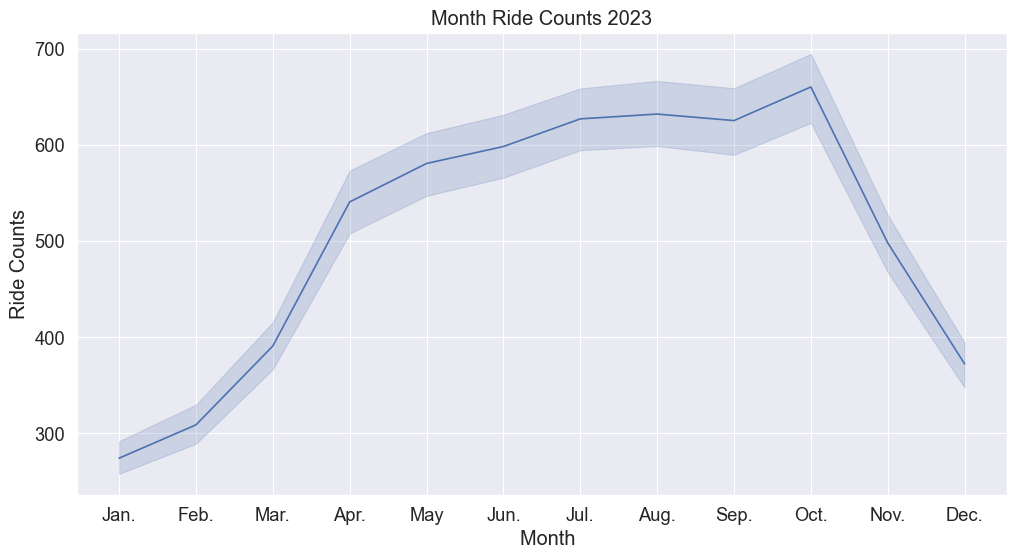

In [78]:
# Create line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total_rides',  data=hourly_2023)
plt.title('Month Ride Counts 2023')
plt.xlabel('  Month')
plt.ylabel('Ride Counts')
#plt.legend(title='Season')
plt.show()

In [79]:


# Calculate the total number of rides per hour
total_rides_per_hour = hourly.groupby('Hour')['Total_rides'].sum()

# Calculate the average number of rides per hour
average_rides_per_hour = total_rides_per_hour.mean()

print("Average number of rides per hour:", average_rides_per_hour)


Average number of rides per hour: 445583.2083333333
